<h1> Logistic Regression </h1>

<h1> Table of Contents </h1>

1. [Dataset Description](#columns)
2. [Importing the packages and dataset](#packages)
3. [Exploratory Data Analysis](#eda)
4. [Feature Engineering](#feature)
5. [Building Models with Single Feature](#modelling)
     - 5.1 [Training a Simple Linear Regression](#linear)
     - 5.2 [Training a Logistic Regression](#logistic)
     - 5.3 [Visualizing Simple Linear Regression Model](#lineareval)
     - 5.4 [Visualizing Logistic Regression Model](#logisticeval)   <br><br>
6. [Logistic Regression with Multiple Features](#lrmodel)
7. [Metrics for Logistic Regression](#metrics)
     



### 1. Dataset Description  <a id='columns'>

The dataset consists of 10000 individuals and whether their credit card has defaulted or not. 

** Objective :**  

Predict whether the individual will default in their credit card payment.

Below are the column description:
- **default** : Whether the individual has defaulted
- **student** : Whether the individual is student
- **balance** : The balance in individual's account
- **income** : Income of individual



### 2. Importing the packages and dataset  <a id='packages'>

In [1]:
# Importing the libraries

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Load Credit Default File

cred_df = pd.read_csv("attachment_default.csv")

### 3. Exploratory Data Analysis  <a id='eda'>

In [3]:
cred_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


** Observation ** : There are no missing values

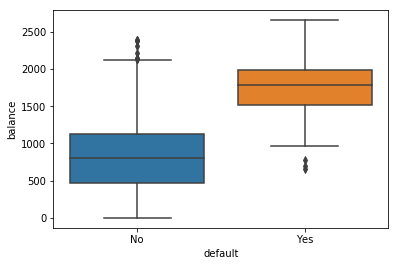

In [5]:
# Relation between balance and default

sns.boxplot(x='default', y='balance', data=cred_df)
plt.show()

** Observation: ** People who have more balance have defaulted more in their credit card payments.

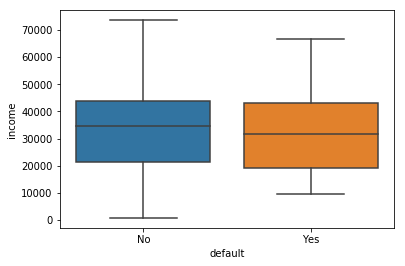

In [6]:
# Relation between income and default

sns.boxplot(x='default', y='income', data=cred_df)
plt.show()

** Observation: ** There is not much relation between income and whether they have defaulted in their credit card payments.

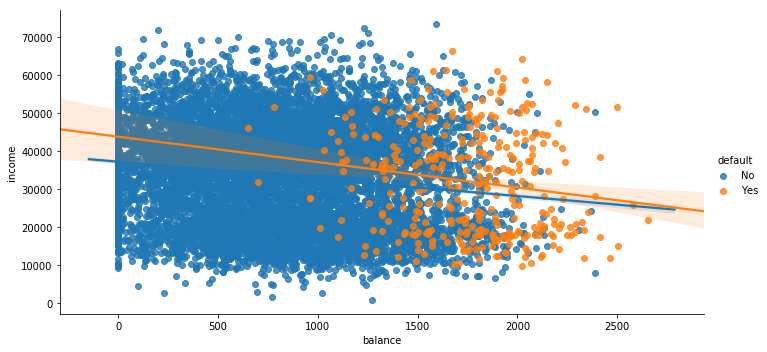

In [8]:
# Relation between balance and income and whether they have defaulted or not 

sns.lmplot(x='balance', y='income', hue = 'default', data=cred_df, aspect=2, fit_reg = True)
plt.show()

** Observation :** People who have more balance have more defaults.

In [9]:
# Relation between Student and default

pd.crosstab(cred_df['default'], cred_df['student'], rownames=['Default'], colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


In [10]:
pd.crosstab(cred_df['default'], cred_df['income'], rownames=['Default'], colnames=['Income'])

Income,771.967729386357,1498.22727449612,2541.20081429887,2702.98233149687,2981.2795475411103,4143.1188436957,4376.810337328139,4664.565047441671,4755.25219033558,4985.1691133645,...,69342.6724803793,69386.9015897979,69541.94859702111,69547.4369460224,70021.6484355306,70700.6478404576,71238.55059818299,71878.7726357675,72461.30139202111,73554.2334951972
Default,,,,,,,,,,,,,,,,,,,,,
No,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Feature Engineering  <a id='feature'>

In [15]:
# Convert Categorical to Numerical for default column

default_dummies = pd.get_dummies(cred_df.default, prefix='default', drop_first= False)
cred_df = pd.concat([cred_df, default_dummies], axis=1)
cred_df.head()

,default,student,balance,income,default_No,default_Yes
0,No,No,729.526495,44361.625074,1,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,1,0
3,No,No,529.250605,35704.493935,1,0
4,No,No,785.655883,38463.495879,1,0


In [16]:
# Convert Categorical to Numerical for student column

student_dummies = pd.get_dummies(cred_df.student, prefix='student', drop_first= True)
cred_df = pd.concat([cred_df, student_dummies], axis=1)
cred_df.head()

,default,student,balance,income,default_No,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,1,0,0
1,No,Yes,817.180407,12106.134700,1,0,1
2,No,No,1073.549164,31767.138947,1,0,0
3,No,No,529.250605,35704.493935,1,0,0
4,No,No,785.655883,38463.495879,1,0,0


### 5. Building Models with Single Feature  <a id='modelling'>

### 5.1 Training a  Simple Linear Regression  <a id='linear'>

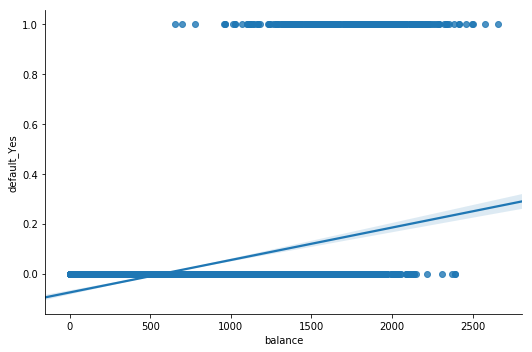

In [17]:
# Visualize simple linear regression on the data between balance and default

sns.lmplot(x='balance', y='default_Yes', data=cred_df, aspect=1.5, fit_reg = True)

In [18]:
# Building Linear Regression Model and determining the coefficients

from sklearn.linear_model import LinearRegression

X = cred_df[['balance']]
y = cred_df['default_Yes']

linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_)                                         # Coefficients for Linear Regression
print(linreg.intercept_)

[0.00012987]
-0.07519195884622262


### 5.2 Training a Logistic Regression  <a id='logistic'>

In [19]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e42)                            # Set Large C value for low regularization to prevent overfitting
logreg.fit(X, y)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)

[[0.00530412]]
[-10.32691114]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


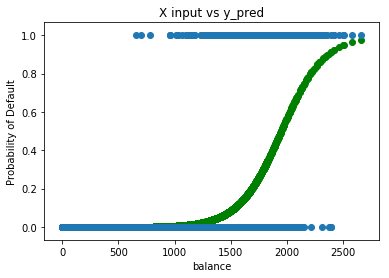

In [24]:
# Visualizing the output of Logistic Regression based on the X inputs and y_pred

y_pred = logreg.predict_proba(X)                               
plt.scatter(X.values, y_pred[:,1], color='green')              # Output of logistic Regression                     
plt.scatter(X.values, y)                                       # Actual data
plt.xlabel('balance')
plt.ylabel('Probability of Default')
plt.title('X input vs y_pred')
plt.show()

In [21]:
y_pred[:,1]

array([1.56639337e-03, 2.49122932e-03, 9.63498451e-03, ...,
       2.89249014e-03, 1.18711169e-01, 9.50326602e-05])

### 5.3 Visualizing Simple Linear Regression Model  <a id='lineareval'>

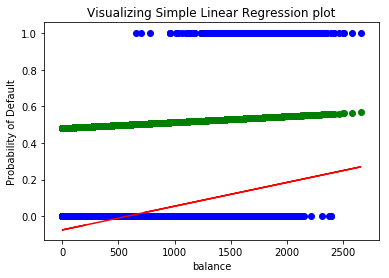

In [27]:
x = X.values
y_hat = linreg.intercept_ + linreg.coef_ * x                  # Predicting y using linear regression coefficients
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))                   # Equation for Sigmoid function

plt.plot(x, y_hat, color='red')                               # Visualizing Linear Regression x, y_hat
plt.scatter(x, y, color = 'blue')                             # Actual data
plt.scatter(x, sig_y_hat, color = 'green')                    # Visualizing Sigmoid of linear regression output
plt.xlabel('balance')
plt.ylabel('Probability of Default')
plt.title('Visualizing Simple Linear Regression plot')
plt.show()

**Observation :**
We can see that Simple Linear Regression performs a terrible task of separating two variables. For this reason we use Logistic Regression.

In [28]:
X.values

array([[ 729.52649521],
       [ 817.18040656],
       [1073.54916401],
       ...,
       [ 845.41198922],
       [1569.00905338],
       [ 200.92218263]])

### 5.4 Visualizing Logistic Regression Model   <a id='logisticeval'>

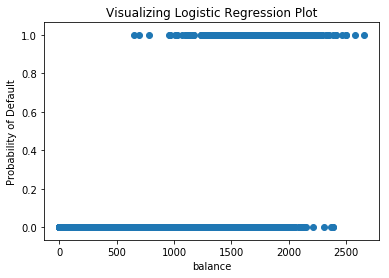

In [30]:
x = X
y_hat = logreg.intercept_ + logreg.coef_ * x                     # Predicting y using logistic regression coefficients
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))                      # Equation for Sigmoid

plt.scatter(x=x, y=sig_y_hat)                                    # Visualizing Sigmoid of logistic regression predictions
plt.scatter(x=x, y=y)                                            # Actual data
plt.xlabel('balance')
plt.ylabel('Probability of Default')
plt.title('Visualizing Logistic Regression Plot')
plt.show()

** Observation :**
Here you can observe that the output of the logistic regression can differentiate between two labels. Hence Logistic Regression is better than Linear Regression for classification problem.

### 6. Logistic Regression with Multiple Features  <a id='lrmodel'>

In [0]:
cred_df.head()

,default,student,balance,income,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [41]:
# Removing repeat columns like default and student

cred_df.drop(['default', 'student'], axis=1, inplace=True)

In [44]:
cred_df.head()

,balance,income,default_No,default_Yes,student_Yes
0,729.526495,44361.625074,1,0,0
1,817.180407,12106.134700,1,0,1
2,1073.549164,31767.138947,1,0,0
3,529.250605,35704.493935,1,0,0
4,785.655883,38463.495879,1,0,0


In [45]:
# splitting the features and labels

X = cred_df.drop('default_Yes',axis = 1)
y = cred_df['default_Yes']

In [59]:
X


,balance,income,default_No,student_Yes
0,729.526495,44361.625074,1,0
1,817.180407,12106.134700,1,1
2,1073.549164,31767.138947,1,0
3,529.250605,35704.493935,1,0
4,785.655883,38463.495879,1,0
5,919.588530,7491.558572,1,1
6,825.513331,24905.226578,1,0
7,808.667504,17600.451344,1,1
8,1161.057854,37468.529288,1,0
9,0.000000,29275.268293,1,0


In [46]:
# splitting the data into train and test with 70:30 ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [47]:
# Building logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=0.6)

In [48]:
# fitting logistic regression model with x and y attributes of train data

logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
x_train

,balance,income,default_No,student_Yes
9069,0.000000,41239.020510,1,0
2603,961.999353,37073.192381,1,0
7738,655.611221,19039.168273,1,1
1579,864.047198,27690.113535,1,0
5058,1306.832034,57561.411261,1,0
5753,672.236354,46336.058275,1,0
3548,1285.991803,31068.122527,1,0
409,728.814960,17909.581072,1,0
4097,1418.388650,12788.719028,1,1
6461,2124.671313,44520.000103,0,0


In [50]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

### 7. Metrics for Logistic Regression  <a id='metrics'>

In [51]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.9996666666666667


In [52]:
# comparing the metrics of predicted lebel and real label of test data
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Train Accuracy:  0.9994285714285714


In [53]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)

In [54]:
print(conf)

[[2906    0]
 [   1   93]]


In [55]:
# Actual Values of y_test
y_test.value_counts()

0    2906
1      94
Name: default_Yes, dtype: int64

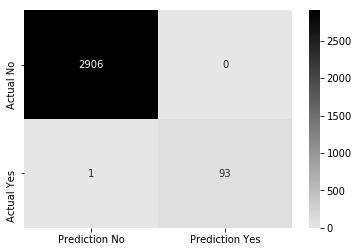

In [56]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [57]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2906
           1       1.00      0.99      0.99        94

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      0.99      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### The End